In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data/test.csv')

In [4]:
df

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat
...,...,...,...,...,...
6565,32863,2019-12-31,Sweden,KaggleMart,Kaggle Hat
6566,32864,2019-12-31,Sweden,KaggleMart,Kaggle Sticker
6567,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug
6568,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat


In [5]:
km_df = df[df['store']=='KaggleMart']
kr_df = df[df['store']=='KaggleRama']

In [6]:
kr_df

,row_id,date,country,store,product
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat
5,26303,2019-01-01,Finland,KaggleRama,Kaggle Sticker
9,26307,2019-01-01,Norway,KaggleRama,Kaggle Mug
10,26308,2019-01-01,Norway,KaggleRama,Kaggle Hat
...,...,...,...,...,...
6562,32860,2019-12-31,Norway,KaggleRama,Kaggle Hat
6563,32861,2019-12-31,Norway,KaggleRama,Kaggle Sticker
6567,32865,2019-12-31,Sweden,KaggleRama,Kaggle Mug
6568,32866,2019-12-31,Sweden,KaggleRama,Kaggle Hat


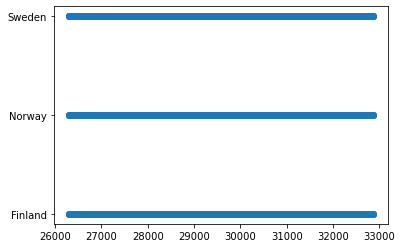

In [7]:
plt.scatter(km_df['row_id'], km_df['country'])

In [8]:
km_df[km_df['country']=='Sweden'].count()

row_id     1095
date       1095
country    1095
store      1095
product    1095
dtype: int64

In [10]:
df2=pd.read_csv('Data/train.csv')

In [12]:
km_df2 = df[df2['store']=='KaggleMart']
kr_df2 = df[df2['store']=='KaggleRama']

<ipython-input-12-8ed84e63773a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  km_df2 = df[df2['store']=='KaggleMart']
<ipython-input-12-8ed84e63773a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kr_df2 = df[df2['store']=='KaggleRama']


In [13]:
km_df2.describe()

,row_id
count,3285.00000
mean,29581.00000
std,1896.88376
min,26298.00000
25%,27938.00000
50%,29581.00000
75%,31224.00000
max,32864.00000


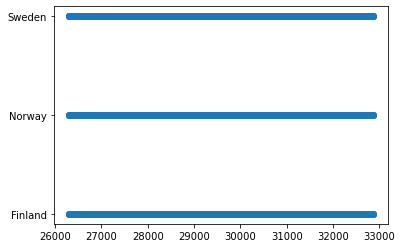

In [14]:
plt.scatter(km_df2['row_id'], km_df2['country'])

In [16]:
unique = km_df2["product"].unique()
unique

array(['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'], dtype=object)

In [17]:
unique2= kr_df2['product'].unique()
unique2

array(['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'], dtype=object)

In [23]:
import os
import csv
product_train_data = os.path.join("Data", "train.csv")


product_list = []
country_list = []
store_list = []

with open(product_train_data) as csvfile:

    csvreader = csv.reader(csvfile, delimiter=',')
    #Read the header row first
    csv_header = next(csvreader)
    total_sales = 0

    import collections
    sales = collections.Counter()

#Python script analyzes the sales and calculates each of the following:

#  The total number of sales
#Count # of rows (skipping first line)
    for row in csvreader:
        total_sales +=1
        sales[row[2]]+=1

        country_name = (row[2])
        store_name = (row[3])
        product_name = (row[4])

        if product_name not in product_list:
            product_list.append(product_name)

        if country_name not in country_list:
            country_list.append(country_name)
            
        if store_name not in store_list:
            store_list.append(store_name)

In [24]:
product_list

['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker']

In [25]:
store_list

['KaggleMart', 'KaggleRama']

In [26]:
country_list

['Finland', 'Norway', 'Sweden']

In [42]:
#sales_df=pd.dataframe{product_list, total_sales}


sales_data={
            'Country': country_list,
            'Product': product_list,
            'Store': store_list,
            'Sales': total_sales,
                }

#sales_dict[f'{c}']=sales_data    
    
country_df=pd.DataFrame(sales_data["Country"])
product_df=pd.DataFrame(sales_data['Product'])
store_df=pd.DataFrame(sales_data['Store'])
sales_df=pd.DataFrame(country_df,product_df,store_df)


In [32]:
sales_data

{'Country': ['Finland', 'Norway', 'Sweden'],
 'Product': ['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'],
 'Store': ['KaggleMart', 'KaggleRama'],
 'Sales': 26298}

In [43]:
country_df

,0
0,Finland
1,Norway
2,Sweden


In [44]:
sales_df

,"(KaggleMart,)","(KaggleRama,)"
"(Kaggle Mug,)",NaN,NaN
"(Kaggle Hat,)",NaN,NaN
"(Kaggle Sticker,)",NaN,NaN
